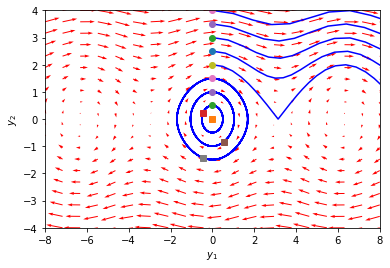

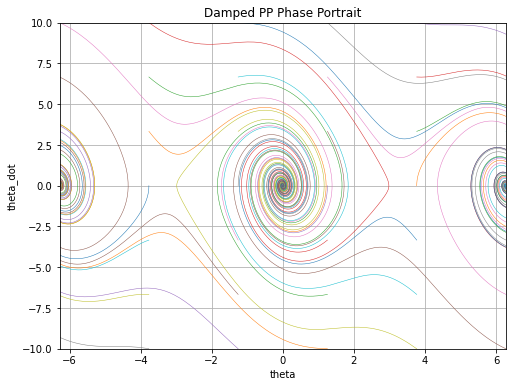

In [21]:
#LRK Classical Mech HW01
#relevant packages...
import gc #never leave this behind or ram will hemorrhage
gc.collect()
%matplotlib inline
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def f(Y,t):
    y1,y2 = Y
    return [y2,-np.sin(y1)]

y1 = np.linspace(-8.0,8.0,20)
y2 = np.linspace(-4.0,4.0,20)

Y1,Y2 = np.meshgrid(y1,y2)

t = 0

u, v = np.zeros(Y1.shape),np.zeros(Y2.shape)

NI,NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i,j]
        y = Y2[i,j]
        yprime = f([x,y],t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-4,4])
plt.ylim([-4,4])

from scipy.integrate import odeint

for y20 in [0,0.5,1,1.5,2,2.5,3,3.5,4]:
    tspan = np.linspace(0,50,200)
    y0 = [0.0,y20]
    ys = odeint(f,y0,tspan)
    plt.plot(ys[:,0],ys[:,1],'b-') # path
    plt.plot([ys[0,0]],[ys[0,1]],'o') # start
    plt.plot([ys[-1,0]],[ys[-1,1]],'s') # end
    

plt.xlim([-8,8])
plt.show()


#LRK Classical Mech HW01
#relevant packages...
#import gc #never leave this behind or ram will hemorrhage
#gc.collect()
#%matplotlib inline
#from scipy.integrate import solve_ivp
#import numpy as np
#import matplotlib.pyplot as plt

# Parameters
g=9.81       # Acceleration due to gravity (m/s^2)
L=1.0        # Length of the pendulum (m)
c=1.0        # Damping coefficient
 
# Define the ODEs
def pendulum_ode(t,state):
    theta,omega = state
    dtheta_dt = omega
    domega_dt = -(g/L)*np.sin(theta) - c*omega
    return [dtheta_dt,domega_dt]
 
# Create a grid of initial conditions in the phase space
theta_range = np.linspace(-2*np.pi,2*np.pi,6)
omega_range = np.linspace(-10,10,7)
 
# Initialize lists to store trajectories
trajectories = []
 
# Integrate the ODEs for a subset of initial conditions
for theta_0 in theta_range:
    for omega_0 in omega_range:
        initial_state = [theta_0,omega_0]
        t_span = (0,10)  # Time span for integration
        sol = solve_ivp(pendulum_ode,t_span,initial_state,t_eval=np.linspace(*t_span,1000))
        trajectories.append(sol.y)
 
# Plot the phase portrait with restricted x and y limits
plt.figure(figsize=(8,6))
for traj in trajectories:
    plt.plot(traj[0],traj[1],linewidth=0.5)
plt.xlim(-2*np.pi,2*np.pi)  # Restrict x-axis limits
plt.ylim(-10,10)  # Restrict y-axis limits
plt.xlabel('theta')
plt.ylabel('theta_dot')
plt.title('Damped PP Phase Portrait')
plt.grid(True)
plt.show()